# Churn prediction for a telecom company

## Project description


### Company Introduction

Your client for this project is a Telecom Service Provider.

- The company has started facing high churn rate due to rapid development in technology and the emerging new competitors in the market.
- The objective is to use the model to take further actions for preventing customers to churn.
- They will have to offer something to their customers so they stick around, example - a promo, discount, loyalty program etc.

### Current Scenario

- Till now they have been using traditional ways which now have become a problem to handle due to human interventions.
- They have a detailed history of their customers and are looking for an automated solution to identify the likeliness of customer churning from using their services.

## Problem Statement

The company suffers from the following problems:

- Due to the boom in the telecom industry with 4G technology, it has become a pain in the neck for the company to retain their customers.
- They are in the middle of setting up more cell sites on the 4G network to improve their 4G services.
- It is plausible for customers to choose 4G services over 3G services due to benefits of cost, speed, latency etc.

In return, they have decided to find a more optimal way and hired a team of data scientists to solve this problem.

### Your Role

- You are given datasets of past customers and their status (Churn: Yes or No).
- Your task is to build a classification model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You - need to build the best possible model.

### Project Deliverables

- Deliverable: Predict whether a customer will churn or not..
- Machine Learning Task: Classification
- Target Variable: Churn (Yes / No)
- Win Condition: N/A (best possible model)

### Evaluation Metric

- The model evaluation will be based on the Accuracy Score.
- To learn more about Accuracy Score and it’s Python implementation, please visit this link.

## Data Description

We are provided with the dataset containing all the necessary information about the customers like their Gender, MonthlyCharges, TotalCharges, PaymentMethod, InternetService, etc.

Also included in the dataset is the column Churn which classifies whether the customer will churn or not.

This is the data that we have to predict for the future customers.

The dataset is divided into two parts: Train and Test sets.

#### Train Set:
- The train set contains 5634 rows and 21 columns.
- The last column Churn is the target variable.

#### Test Set:
- The test set contains 1409 rows and 20 columns.
- The test set doesn’t contain the Churn column.
- It needs to be predicted for the test set.

### Dataset Feature Description
The Dataset contains the following columns:

|Column Name|| Description |
|------||:----|
|CustomerID|| Passenger Identity|
|Gender|| Whether the customer is a male or a female|
|SeniorCitizen|| Whether the customer is a senior citizen or not (1, 0)|
|Partner|| Whether the customer has a partner or not (Yes, No)|
|Dependents||	Whether the customer has dependents or not (Yes, No)|
|Tenure	Number|| of months the customer has stayed with the company|
|PhoneService||	Whether the customer has a phone service or not (Yes, No)|
|MultipleLines||	Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService||	Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity||	Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup||	Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection||	Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport||	Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV||	Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies||	Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract||	The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling||	Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod||	The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card(automatic))||
|MonthlyCharges||	The amount charged to the customer monthly|
|TotalCharges||	The total amount charged to the customer|
|Churn||	Whether the customer churned or not (Yes or No)|

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

# import the dataset (train file)
train_data = pd.read_csv("")
print("Data Shape : ", train_data.shape)
train_data.head()

Data Shape :  (5634, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [3]:
# changing column names to standardize them as starting with small letters.
new_col_list = ['customerId', 'gender', 'is_seniorcitizen', 'has_partner', 'has_dependents',
       'tenure', 'has_phoneService', 'multipleLines', 'has_internetService',
       'onlineSecurity', 'onlineBackup', 'deviceProtection', 'techSupport',
       'streamingTV', 'streamingMovies', 'contract', 'has_paperlessBilling',
       'paymentMethod', 'monthlyCharges', 'totalCharges', 'churn']
train_data.columns = new_col_list
train_data.columns

Index(['customerId', 'gender', 'is_seniorcitizen', 'has_partner',
       'has_dependents', 'tenure', 'has_phoneService', 'multipleLines',
       'has_internetService', 'onlineSecurity', 'onlineBackup',
       'deviceProtection', 'techSupport', 'streamingTV', 'streamingMovies',
       'contract', 'has_paperlessBilling', 'paymentMethod', 'monthlyCharges',
       'totalCharges', 'churn'],
      dtype='object')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerId            5634 non-null   object 
 1   gender                5634 non-null   object 
 2   is_seniorcitizen      5634 non-null   int64  
 3   has_partner           5634 non-null   object 
 4   has_dependents        5634 non-null   object 
 5   tenure                5634 non-null   int64  
 6   has_phoneService      5634 non-null   object 
 7   multipleLines         5634 non-null   object 
 8   has_internetService   5634 non-null   object 
 9   onlineSecurity        5634 non-null   object 
 10  onlineBackup          5634 non-null   object 
 11  deviceProtection      5634 non-null   object 
 12  techSupport           5634 non-null   object 
 13  streamingTV           5634 non-null   object 
 14  streamingMovies       5634 non-null   object 
 15  contract             

### Insights:

1. customerId can be dropped. Information of column phoneService is included in the column multipleLines, so phoneService can be dropped. 
2. There don't seem to be any null values.
3. 'totalCharges' has DType as object instead of float, this needs to be investigated. This might have hidden null values.
4. For columns, 'gender', 'has_partner', 'has_dependents','has_internetService','onlineSecurity', 'onlineBackup','deviceProtection', 'techSupport','streamingTV', 'streamingMovies', 'has_PaperlessBilling', 'paymentMethod', there is **no inherent order** to the categories, hence we can go for **onehot encoding**.
5. For columns, multipleLines and contract, there is some **ordinality**. For example, 2 year contract is better than 1 year contract, and multiple lines is better than single line, which is better than no line. As there is an ordinality, we can go for **ordinal encoding** (which can be implemented using labelEncoding as well)

Good resource for all encoding techniques.
https://www.mygreatlearning.com/blog/label-encoding-in-python/

In [5]:
# "labels =" is not needed, but gives more readability. 
train_data.drop(labels=['customerId','has_phoneService'],axis=1,inplace=True)

In [6]:
train_data.describe(include='all')

,gender,is_seniorcitizen,has_partner,has_dependents,tenure,multipleLines,has_internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,has_paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
count,5634,5634.000000,5634,5634,5634.000000,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634.000000,5634,5634
unique,2,NaN,2,2,NaN,3,3,3,3,3,3,3,3,3,2,4,NaN,5291,2
top,Male,NaN,No,No,NaN,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,2838,NaN,2932,3968,NaN,2700,2479,2801,2498,2473,2781,2246,2213,3104,3321,1893,NaN,8,4113
mean,NaN,0.161874,NaN,NaN,32.277955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.779127,NaN,NaN
std,NaN,0.368368,NaN,NaN,24.555211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.104993,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.400000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.375000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


<AxesSubplot:>

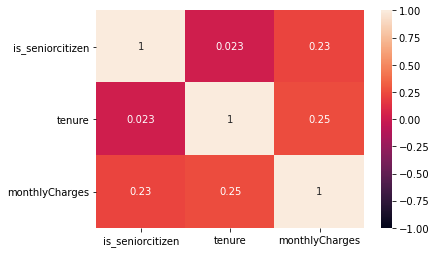

In [7]:
# as of now, only below three columns are numerical, so we get correlations only for these.
# getting correlation doesn't help in our prediction in this case
sns.heatmap(train_data.corr(),vmin=-1,annot=True)

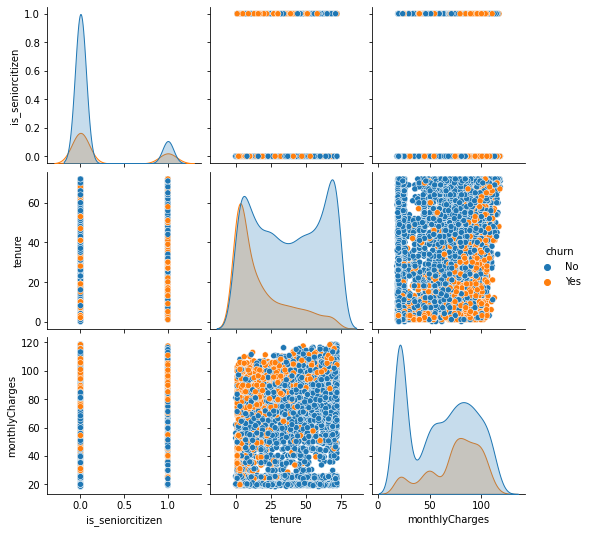

In [8]:
# Same is with the pairplot, and it is kind ouf useless for us :
sns.pairplot(data=train_data, hue='churn')

<AxesSubplot:xlabel='churn', ylabel='count'>

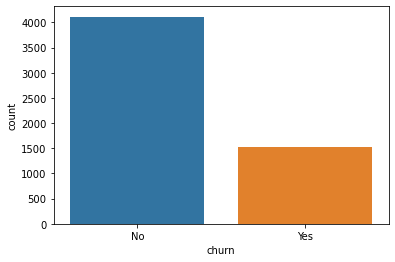

In [9]:
# checking the distribution/balance of the data, using the target variable - churn
sns.countplot(x = train_data.churn)

# A we can see, the data is imbalanced with more records with the Churn column as NO.

<AxesSubplot:xlabel='churn', ylabel='count'>

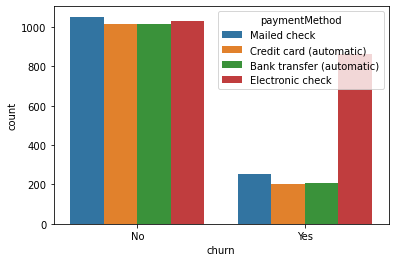

In [10]:
sns.countplot(x = train_data.churn, hue = train_data.paymentMethod)

<AxesSubplot:xlabel='churn', ylabel='count'>

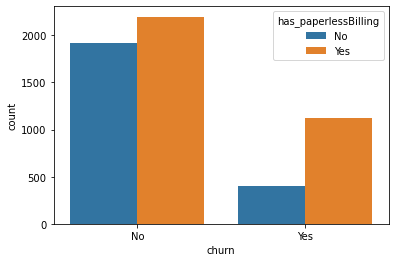

In [11]:
sns.countplot(x = train_data.churn, hue = train_data.has_paperlessBilling)

<AxesSubplot:xlabel='has_partner', ylabel='count'>

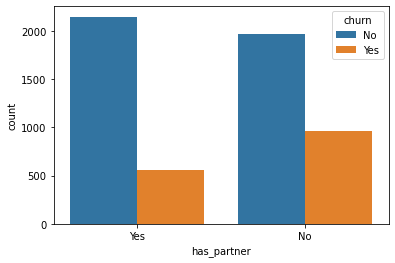

In [12]:
sns.countplot(x=train_data.has_partner,hue=train_data.churn)
# people with no partner are more likely to churn 

In [13]:
# identifying the null values in the totalCharges column, which is of DType object.

        #irrelevent
        # when to use loc ?
        # train_data.loc(train_data['totalCharges']==258.35)
#         train_data.loc(train_data['totalCharges']=='625.05')

# train_data[train_data['totalCharges'] == 258.35]
# above doesn't return the row, while below one returns the row, hence we know that these are strings.
# train_data[train_data['totalCharges'] == '258.35']

# now we search for missing values.
# train_data[train_data['totalCharges'] == '']
# train_data[train_data['totalCharges'] == 'NaN']
# train_data[train_data['totalCharges'] == 'NA']
# train_data[train_data['totalCharges'] == 'na']
train_data[train_data['totalCharges'] == ' ']

,gender,is_seniorcitizen,has_partner,has_dependents,tenure,multipleLines,has_internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,has_paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn
899,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2224,Female,0,Yes,Yes,0,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
2697,Male,0,Yes,Yes,0,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
3054,Male,0,Yes,Yes,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3488,Male,0,No,Yes,0,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
4056,Female,0,Yes,Yes,0,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
4761,Female,0,Yes,Yes,0,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
5607,Male,0,No,Yes,0,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No


In [14]:
# train_data.loc(train_data['totalCharges']==625.05)
train_data[train_data['totalCharges'] == 625.05]

,gender,is_seniorcitizen,has_partner,has_dependents,tenure,multipleLines,has_internetService,onlineSecurity,onlineBackup,deviceProtection,techSupport,streamingTV,streamingMovies,contract,has_paperlessBilling,paymentMethod,monthlyCharges,totalCharges,churn


In [15]:
#Converting the column type from object to float/numeric
cols = ['totalCharges']
train_data[cols] = train_data[cols].apply(pd.to_numeric, errors='coerce')

###### with pd.to_numeric, we need to pass an argument callled errors, which is by default 'raise'

Errors has these 3 values :
-     ignore - if a non-numeric record is found, it doesn't change it.
-     coerce - changes the non-numeric record to NaN
-     raise - raises an exception.

hence ignore and coerce are used as inbuilt exception handling.

In [16]:
#Because tenure is 0 for these, filling totalCharges with 0 as well.
train_data.totalCharges.fillna(0,inplace=True)

<AxesSubplot:>

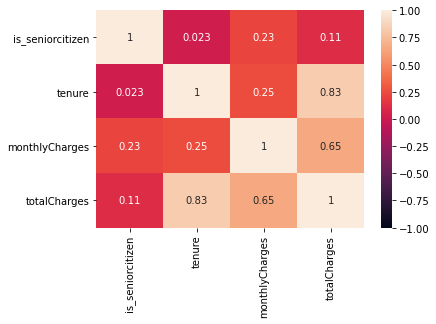

In [17]:
# checking the heatmap after cleaning the totalCharges column
sns.heatmap(train_data.corr(),vmin=-1,annot=True)

We see something which was a common sense,

ie, the tenure and the monthly charges columns are **highly correlated** with the total charges column.

**Correlations** :
- tenure - totalCharges = 0.83
- monthlyCharges - totalCharges = 0.65

BUt we will not drop it at this stage, we will check the correlation in the other columns, after encoding.

In [18]:
train_data.columns

Index(['gender', 'is_seniorcitizen', 'has_partner', 'has_dependents', 'tenure',
       'multipleLines', 'has_internetService', 'onlineSecurity',
       'onlineBackup', 'deviceProtection', 'techSupport', 'streamingTV',
       'streamingMovies', 'contract', 'has_paperlessBilling', 'paymentMethod',
       'monthlyCharges', 'totalCharges', 'churn'],
      dtype='object')

###### One-Hot Encoding for particular columns selected :

- We used DropFirst as True below, so as to avoid the dummy-variable-trap

In [19]:
onehotEncoded = pd.get_dummies(train_data[['gender','has_partner', 'has_dependents','has_internetService','onlineSecurity', 'onlineBackup','deviceProtection', 'techSupport','streamingTV', 'streamingMovies', 'has_paperlessBilling', 'paymentMethod','churn']], drop_first=True)
onehotEncoded.head()

,gender_Male,has_partner_Yes,has_dependents_Yes,has_internetService_Fiber optic,has_internetService_No,onlineSecurity_No internet service,onlineSecurity_Yes,onlineBackup_No internet service,onlineBackup_Yes,deviceProtection_No internet service,...,techSupport_Yes,streamingTV_No internet service,streamingTV_Yes,streamingMovies_No internet service,streamingMovies_Yes,has_paperlessBilling_Yes,paymentMethod_Credit card (automatic),paymentMethod_Electronic check,paymentMethod_Mailed check,churn_Yes
0,1,1,1,0,1,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,1,0,...,1,0,0,0,1,0,1,0,0,1
2,1,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
4,1,0,0,0,0,0,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0


###### Ordinal encoding :

- Using Label encoder for contract column works because
    - label encoder uses an alphabetical order, 
    - alphabetical order matches with the order that we want
    - Contract - month-to-month(0), One Year(1), Two Year(2)


- For the multipleLines column, we perform the manual ordinal encoding using the map function.
    - for map, we are passing a dict as parameter. Another possible way is to pass a function.
    - MultipleLines - Not a phone user(0), no(1), yes(2)
    
Ideally, we should avoid using label encoding even if the order matches the requirement, but here it is used to just show that its possible.


In [20]:
#label encoding
from sklearn.preprocessing import LabelEncoder

LabEnc = LabelEncoder()
ordinalEncoded = train_data[['contract']].apply(LabEnc.fit_transform)


# ordinal encoding
multipleLines_map = {'No phone service':0,
                     'No':1,
                     'Yes':2}
ordinalEncoded['multipleLines'] = train_data.multipleLines.map(multipleLines_map)

In [21]:
ordinalEncoded.head()

,contract,multipleLines
0,2,1
1,1,1
2,2,2
3,1,2
4,1,1


In [22]:
train_df = train_data[['tenure','monthlyCharges', 'totalCharges']]
train_df = pd.concat(objs=[train_df,ordinalEncoded, onehotEncoded], axis=1)
train_df.head()

,tenure,monthlyCharges,totalCharges,contract,multipleLines,gender_Male,has_partner_Yes,has_dependents_Yes,has_internetService_Fiber optic,has_internetService_No,...,techSupport_Yes,streamingTV_No internet service,streamingTV_Yes,streamingMovies_No internet service,streamingMovies_Yes,has_paperlessBilling_Yes,paymentMethod_Credit card (automatic),paymentMethod_Electronic check,paymentMethod_Mailed check,churn_Yes
0,12,19.70,258.35,2,1,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
1,42,73.90,3160.55,1,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
2,71,65.15,4681.75,2,2,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,71,85.45,6300.85,1,2,1,1,1,0,0,...,1,0,1,0,1,0,0,1,0,0
4,30,70.40,2044.75,1,1,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


<AxesSubplot:>

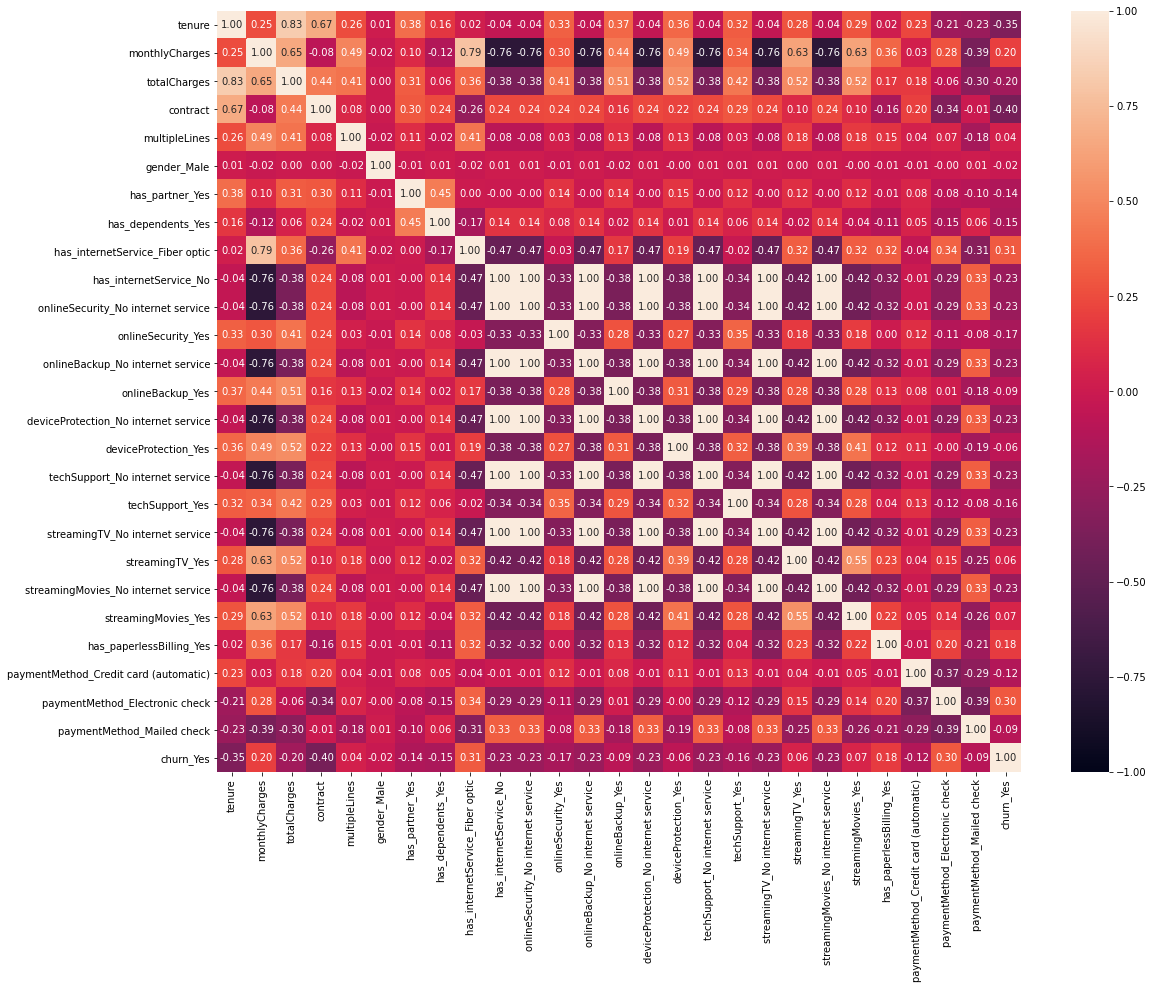

In [23]:
plt.figure(figsize=[18,14])
sns.heatmap(train_df.corr(),annot=True,vmin=-1, vmax=1, fmt = '.2f')

The No Internet Service columns all have a perfect correlation among themselves. So this is not a good dataset.

One solution would be : When getting the dummy variables, instead of dropFirst, we should drop the noInternetService columns

In [24]:
onehotEncodedNew = pd.get_dummies(train_data[['gender','has_partner', 'has_dependents','has_internetService','onlineSecurity', 'onlineBackup','deviceProtection', 'techSupport','streamingTV', 'streamingMovies', 'has_paperlessBilling', 'paymentMethod','churn']])
# onehotEncodedNew.columns

###### columns to be dropped

['gender_Male', 'has_partner_No', 'has_dependents_No', 'has_internetService_Fiber optic', 'onlineSecurity_No internet service', 'onlineBackup_No internet service','deviceProtection_No internet service', 'techSupport_No internet service', 'streamingTV_No internet service', 'streamingMovies_No internet service', 'has_paperlessBilling_No','paymentMethod_Mailed check', 'churn_No']

In [25]:
onehotEncodedNew.drop(labels=['gender_Male', 'has_partner_No', 'has_dependents_No', 'has_internetService_Fiber optic', 'onlineSecurity_No internet service', 'onlineBackup_No internet service','deviceProtection_No internet service', 'techSupport_No internet service', 'streamingTV_No internet service', 'streamingMovies_No internet service', 'has_paperlessBilling_No','paymentMethod_Mailed check', 'churn_No'], 
                      axis=1, inplace=True)

<AxesSubplot:>

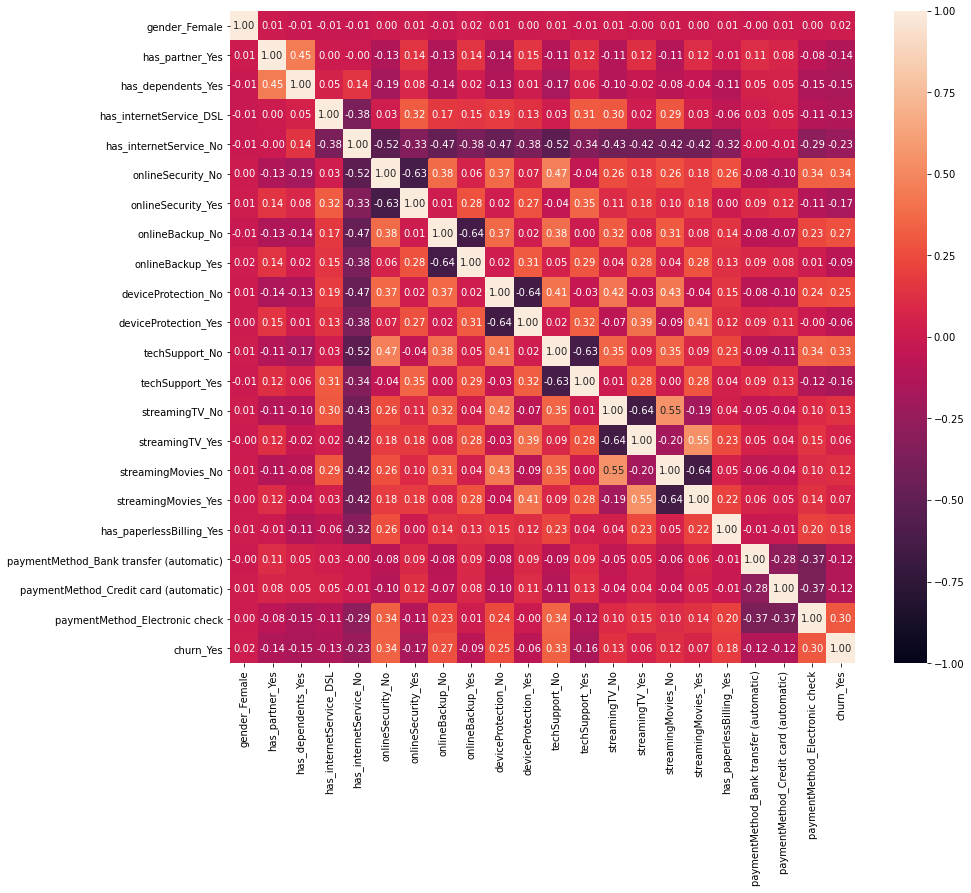

In [26]:
plt.figure(figsize=(14,12))
sns.heatmap(onehotEncodedNew.corr(), annot=True, fmt='.2f', vmax=1, vmin=-1)

Now there is very less correlation amongst the columns, lets make our new training df

In [27]:
train_dfNew = train_data[['tenure','monthlyCharges', 'totalCharges']]
train_dfNew = pd.concat(objs=[train_dfNew,ordinalEncoded, onehotEncodedNew], axis=1)
train_dfNew.head()

,tenure,monthlyCharges,totalCharges,contract,multipleLines,gender_Female,has_partner_Yes,has_dependents_Yes,has_internetService_DSL,has_internetService_No,...,techSupport_Yes,streamingTV_No,streamingTV_Yes,streamingMovies_No,streamingMovies_Yes,has_paperlessBilling_Yes,paymentMethod_Bank transfer (automatic),paymentMethod_Credit card (automatic),paymentMethod_Electronic check,churn_Yes
0,12,19.70,258.35,2,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,42,73.90,3160.55,1,1,1,0,0,1,0,...,1,1,0,0,1,0,0,1,0,1
2,71,65.15,4681.75,2,2,0,1,0,1,0,...,1,1,0,1,0,0,1,0,0,0
3,71,85.45,6300.85,1,2,0,1,1,1,0,...,1,0,1,0,1,0,0,0,1,0
4,30,70.40,2044.75,1,1,0,0,0,1,0,...,1,0,1,1,0,0,0,0,1,0


<AxesSubplot:>

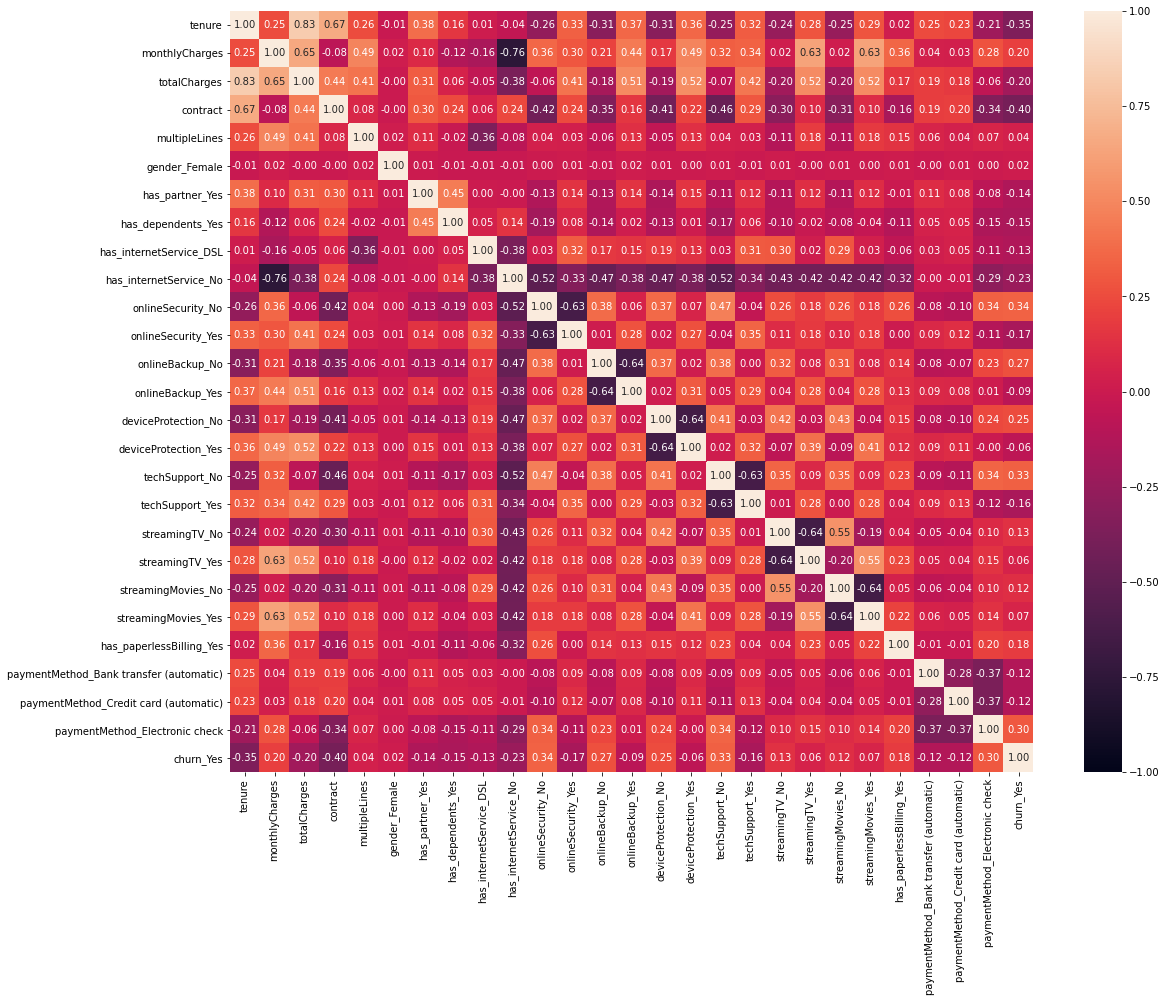

In [28]:
plt.figure(figsize=[18,14])
sns.heatmap(train_dfNew.corr(),annot=True,vmin=-1, vmax=1, fmt = '.2f')

**Low correlation with target - Churn (safe to ignore)** :
   - multipleLines(0.04)
   - gender_Female(-.02)
   - onlineBackup_Yes(-.09) rem
   - deviceProtection_Yes(-.06) rem
   - streamingTV_yes(.06) rem
   - streamingMovies_Yes(.07) rem
   
**Significant correlation with target - Churn**:
   - tenure(-.35)
   - contract(-.40)
   - onlineSecurity_No(.34)
   - techSupport_No(.33)
   - paymentMethod_electronic Check(.3)

**High correlation among themselves** :
   - tenure/totalCharges (.83)
   - tenure/contract (.67)
   
   - monthlyCharges/totalCharges (.65)
   - monthlyCharges/~~multipleLines~~(.49)
   - monthlyCharges/has_internetService_No(-.76)
   - monthlyCharges/~~streamingTV_Yes~~(.63)
   - monthlyCharges/~~streamingMovies_Yes~~(.63)
   
   - contract/techSupport_No(-.46)
   
   - totalCharges/~~onlineBackup_Yes~~(.51)
   - totalCharges/~~deviceProtection_Yes~~(.52)
   - totalCharges/~~streamingTV_Yes~~(.52)
   - totalCharges/~~streamingMovies_Yes~~(.52)

   - has_partner_Yes/has_dependents_Yes(.45)
   
   - has_internetService_No/onlineSecurity_No(-.52)
   - has_internetService_No/onlineBackup_No(-.47)
   - has_internetService_No/deviceProtection_No(-.47)
   - has_internetService_No/techSupport_No(-.52)
   
   - onlineSecurity_No/~~onlineSecurity_Yes~~(-.63)
   - onlineBackup_No/~~onlineBackup_Yes~~(-.64)
   - deviceProtection_No/~~deviceProtection_Yes~~(-.64)
   - techSupport_No/~~techSupport_Yes~~(-.63)
   - streamingTV_No/~~streamingTV_Yes~~(-.64)
   - streamingMovies_No/~~streamingMovies_Yes~~(-.64)

**Following columns will be safely dropped because they are causing multicollinearity, as well as not contributing to the target variable much.**


1. multipleLines
2. streamingTV_Yes
3. streamingMovies_Yes
4. onlineBackup_Yes
5. deviceProtection_Yes
6. onlineSecurity_Yes
7. techSupport_Yes

For other columns causing collinearity, we will try building models and check the effects.
(A balance needs to be struck between reducing multicollinearity and keeping columns with high-collinearity with churn.)

In [29]:
train_dfNew.drop(['multipleLines','streamingTV_Yes','streamingMovies_Yes','onlineBackup_Yes','deviceProtection_Yes','onlineSecurity_Yes','techSupport_Yes'],axis=1,inplace=True)

<AxesSubplot:>

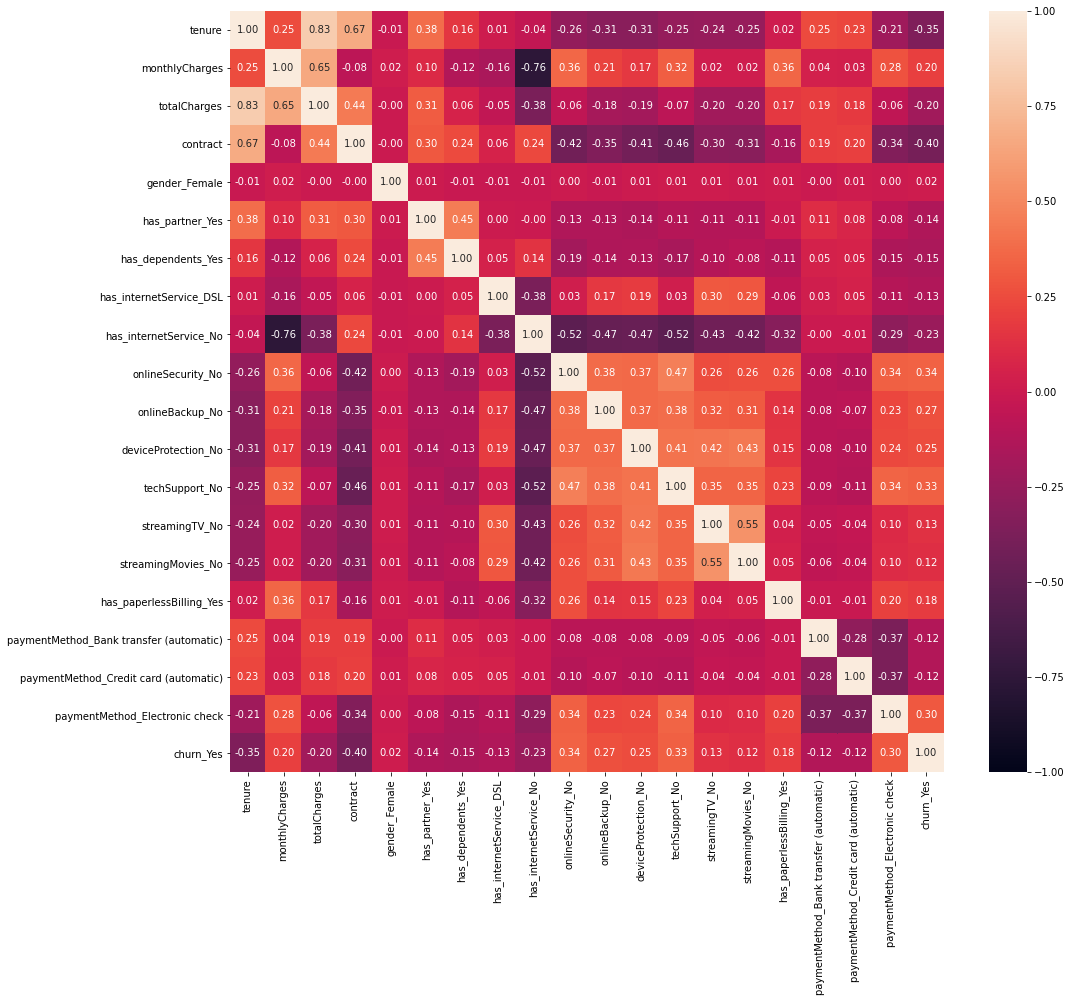

In [30]:
# Now checking the heatmap again
plt.figure(figsize=[16,14])
sns.heatmap(train_dfNew.corr(),annot=True,vmin=-1, vmax=1, fmt='.2f')

In [31]:
# from sklearn.model_selection import train_test_split

# x = train_df[['totalCharges', 'contract', 'multipleLines', 'gender_Male',
#        'has_partner_Yes', 'has_dependents_Yes',
#        'has_internetService_Fiber optic', 'onlineSecurity_No',
#        'onlineBackup_No', 'deviceProtection_No', 'techSupport_No',
#        'streamingTV_No', 'streamingMovies_No', 'has_paperlessBilling_Yes',
#        'paymentMethod_Bank transfer (automatic)',
#        'paymentMethod_Credit card (automatic)',
#        'paymentMethod_Electronic check', 'paymentMethod_Mailed check']]

# y = train_df['churn_Yes']
# x_train, x_validation, y_train, y_validation = train_test_split(x,y,test_size=0.2, random_state=1)

Lets build the model and check the accuracy

In [32]:
from sklearn.model_selection import train_test_split

x = train_dfNew[train_dfNew.columns[:-1]]
y = train_dfNew['churn_Yes']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [33]:
x_train.head()

,tenure,monthlyCharges,totalCharges,contract,gender_Female,has_partner_Yes,has_dependents_Yes,has_internetService_DSL,has_internetService_No,onlineSecurity_No,onlineBackup_No,deviceProtection_No,techSupport_No,streamingTV_No,streamingMovies_No,has_paperlessBilling_Yes,paymentMethod_Bank transfer (automatic),paymentMethod_Credit card (automatic),paymentMethod_Electronic check
2365,30,19.70,625.05,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1300,23,83.75,1849.95,0,1,1,1,0,0,1,1,1,1,0,1,1,0,0,1
3251,14,95.80,1346.30,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,1
2354,56,19.70,1051.90,2,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
579,63,98.00,6218.45,2,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0


In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=150)
_ = logreg.fit(x_train,y_train)

In [35]:
print(f"Training Accuracy : {logreg.score(x_train,y_train)}")
print(f"Testing Accuracy : {logreg.score(x_test,y_test)}")

Training Accuracy : 0.7989793654315509
Testing Accuracy : 0.8021295474711624


Now, we got a model working, but the accuracy is not that great

Possible things to do :
1. try reducing the multicollinearity even more.
2. Try to scale and normalise the column values.
3. Try GridsearchCv for the hyperparameter tuning.

**Standard Scaling**

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
#it is necessary to store the output of the scaler to a new variable.
# the output is a nnumpy array, so we cannot see the head or anything.

# the main question here is that the standard scaler is scaling our binary variables as well, and probably we dont want that.

x_test_scaled = scaler.transform(x_test)

In [37]:
print(type(x_train_scaled))
print(x_train_scaled)

<class 'numpy.ndarray'>
[[-0.08151035 -1.48282956 -0.71722818 ... -0.5264336  -0.52299483
  -0.7112292 ]
 [-0.36657522  0.64606159 -0.17241991 ... -0.5264336  -0.52299483
   1.40601651]
 [-0.7330872   1.04657898 -0.39643222 ... -0.5264336  -0.52299483
   1.40601651]
 ...
 [-1.22176983  0.85379883 -0.9107065  ... -0.5264336   1.91206478
  -0.7112292 ]
 [-0.20368101 -1.32328737 -0.6563381  ... -0.5264336  -0.52299483
   1.40601651]
 [-0.93670496  0.54967152 -0.66091931 ... -0.5264336  -0.52299483
   1.40601651]]


In [38]:
# checking if standard scaling brings about any change

_ = logreg.fit(x_train_scaled,y_train)
print(f"Training Accuracy : {logreg.score(x_train_scaled,y_train)}")
print(f"Testing Accuracy : {logreg.score(x_test_scaled,y_test)}")

Training Accuracy : 0.8025293987131129
Testing Accuracy : 0.8039041703637977


**Min Max Scaling**

In [39]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
x_train_mmscaled = mm_scaler.fit_transform(x_train)

x_test_mmscaled = mm_scaler.transform(x_test)

print(x_train_mmscaled)
print(x_test_mmscaled)

[[0.41666667 0.01448551 0.07197057 ... 0.         0.         0.        ]
 [0.31944444 0.65434565 0.21301009 ... 0.         0.         1.        ]
 [0.19444444 0.77472527 0.15501796 ... 0.         0.         1.        ]
 ...
 [0.02777778 0.71678322 0.02188306 ... 0.         1.         0.        ]
 [0.375      0.06243756 0.08773374 ... 0.         0.         1.        ]
 [0.125      0.62537463 0.08654776 ... 0.         0.         1.        ]]
[[0.98611111 0.52547453 0.57265567 ... 0.         1.         0.        ]
 [0.01388889 0.02497502 0.00238923 ... 0.         0.         0.        ]
 [0.01388889 0.02097902 0.00234317 ... 0.         0.         0.        ]
 ...
 [0.52777778 0.01348651 0.08259258 ... 0.         0.         1.        ]
 [0.23611111 0.58141858 0.14201824 ... 0.         0.         1.        ]
 [0.69444444 0.52747253 0.39665277 ... 0.         0.         1.        ]]


In [40]:
_ = logreg.fit(x_train_mmscaled,y_train)
print(f"Training Accuracy : {logreg.score(x_train_mmscaled,y_train)}")
print(f"Testing Accuracy : {logreg.score(x_test_mmscaled,y_test)}")

Training Accuracy : 0.8025293987131129
Testing Accuracy : 0.805678793256433


Using both Standard scaler and Minmax scaler, there was not much of a difference.

Now, lets try to optimise the hyper-parameters using GridSearchCV

In [41]:
from sklearn.model_selection import GridSearchCV

C = np.logspace(-2,2,30)
penalty = ['l2']
max_iter = [125, 150, 175]

parameters = {'C':C, 'penalty':penalty, 'max_iter':max_iter}

logreg2 = LogisticRegression()

GS = GridSearchCV(logreg2, parameters, cv = 5, n_jobs=-1)

In [42]:
GS.fit(x_train, y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.37382380e-02, 1.88739182e-02, 2.59294380e-02,
       3.56224789e-02, 4.89390092e-02, 6.72335754e-02, 9.23670857e-02,
       1.26896100e-01, 1.74332882e-01, 2.39502662e-01, 3.29034456e-01,
       4.52035366e-01, 6.21016942e-01, 8.53167852e-01, 1.17210230e+00,
       1.61026203e+00, 2.21221629e+00, 3.03919538e+00, 4.17531894e+00,
       5.73615251e+00, 7.88046282e+00, 1.08263673e+01, 1.48735211e+01,
       2.04335972e+01, 2.80721620e+01, 3.85662042e+01, 5.29831691e+01,
       7.27895384e+01, 1.00000000e+02]),
                         'max_iter': [125, 150, 175], 'penalty': ['l2']})

In [43]:
print("\n The best score across ALL searched params:\n",GS.best_score_)
print("\n The best parameters across ALL searched params:\n",GS.best_params_)


 The best score across ALL searched params:
 0.7974271012006862

 The best parameters across ALL searched params:
 {'C': 0.01, 'max_iter': 125, 'penalty': 'l2'}


In [44]:
# So gridSearch says, the best params are C = 0.01, max_iter = 125, and penalty = l2
# Lets check the model with those params:

logreg3 = LogisticRegression(C=0.01, max_iter=125)
logreg3.fit(x_train, y_train)

print(f"Training Accuracy : {logreg3.score(x_train,y_train)}")
print(f"Testing Accuracy : {logreg3.score(x_test,y_test)}")

Training Accuracy : 0.8023075216330153
Testing Accuracy : 0.8065661047027507


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


No particular improvement with hyperparameter tuning as well

In [45]:
weights = logreg3.coef_[0]
print(f"\nCoefficients array : \n{weights}\n")

max_df = pd.DataFrame({'feature':['tenure','monthlyCharges','totalCharges','contract'],
              'Max_values':[x_train.tenure.max(), x_train.monthlyCharges.max(), x_train.totalCharges.max(), x_train.contract.max()], 
              'position in x_train':[x_train.columns.get_loc('tenure'), x_train.columns.get_loc('monthlyCharges'), x_train.columns.get_loc('totalCharges'), x_train.columns.get_loc('contract')]})


print(max_df)

# Multiplying with the max values, to bring the weights in the same scale of impact.
weights_scaled = np.multiply(weights,np.array([72,118,8585,2, 1,1,1,1, 1,1,1,1, 1,1,1,1, 1,1,1]))
print(f"\nCoefficients array after scaling : \n{weights_scaled}\n")


Coefficients array : 
[-7.61362432e-02  5.36073975e-03  4.72490564e-04 -4.85628413e-01
  2.02925469e-02  9.24389883e-02 -8.31641028e-02 -3.13547608e-01
 -3.48891661e-01  3.34905747e-01  1.05789003e-01  1.03121850e-01
  3.16762491e-01 -5.69442640e-02 -1.01381239e-01  2.41167014e-01
 -4.48906402e-02  3.60595715e-03  1.31312155e-01]

          feature  Max_values  position in x_train
0          tenure       72.00                    0
1  monthlyCharges      118.35                    1
2    totalCharges     8684.80                    2
3        contract        2.00                    3

Coefficients array after scaling : 
[-5.48180951e+00  6.32567290e-01  4.05633149e+00 -9.71256826e-01
  2.02925469e-02  9.24389883e-02 -8.31641028e-02 -3.13547608e-01
 -3.48891661e-01  3.34905747e-01  1.05789003e-01  1.03121850e-01
  3.16762491e-01 -5.69442640e-02 -1.01381239e-01  2.41167014e-01
 -4.48906402e-02  3.60595715e-03  1.31312155e-01]



In [46]:
importance_df = pd.DataFrame({'features':x_train.columns, 'weights':weights_scaled, 'correlation with churn':train_dfNew.corr()['churn_Yes'][:-1].to_list()})
x_train.corrwith
print(importance_df)

                                   features   weights  correlation with churn
0                                    tenure -5.481810               -0.351885
1                            monthlyCharges  0.632567                0.196805
2                              totalCharges  4.056331               -0.196353
3                                  contract -0.971257               -0.397432
4                             gender_Female  0.020293                0.015329
5                           has_partner_Yes  0.092439               -0.140414
6                        has_dependents_Yes -0.083164               -0.152236
7                   has_internetService_DSL -0.313548               -0.126409
8                    has_internetService_No -0.348892               -0.227684
9                         onlineSecurity_No  0.334906                0.338102
10                          onlineBackup_No  0.105789                0.270107
11                      deviceProtection_No  0.103122           

We can see that the model is giving importance to features differently than the correlations with target :
- contract has the highest corr with churn, but model gives it less importance than tenure and total charges.
- model gives totalCharges the second most importance, whereas correltaion wise, it is 7th (behind contract, tenure, onlineSecurity_No, techSupport_No, paymentMethod_Electronic check, and monthlyCharges)
- onlineSecurity_No which has the 3rd highest correlation, gets the 6th most importance by the model (behind tenure, totalCharges, contract, monthlyCharges, has_internetService_No)

There are many such discrepancies, and these may be caused because of the multicollinearity in the independant variables.
So We will try to reduce this multicollinearity.

**Significant correlation with target - Churn**:
   - tenure(-.35)
   - contract(-.40)
   - onlineSecurity_No(.34)
   - techSupport_No(.33)

**High correlation among themselves** :
   - tenure/~~totalCharges~~ (.83)
   - tenure/contract (.67)
   
   - monthlyCharges/~~totalCharges~~ (.65)
   - monthlyCharges/~~has_internetService_No~~(-.76)

   
   - contract/techSupport_No(-.46)

   - has_partner_Yes/has_dependents_Yes(.45)
   
   - ~~has_internetService_No~~/onlineSecurity_No(-.52)
   - ~~has_internetService_No~~/onlineBackup_No(-.47)
   - ~~has_internetService_No~~/deviceProtection_No(-.47)
   - ~~has_internetService_No~~/techSupport_No(-.52)

The information in column totalCharges, can be found in the information of columns tenure and monthlyCharges. Also the absolute correlation of totalCharges(-0.196353) with churn is less than that of the said columns of tenure(-0.351885) and monthlyCharges(0.196805) So we can drop this column.

The collective information in has_internetService_No, can be found in monthlyCharges, onlineSecurity_No, onlineBackup_No, deviceProtection_No, techSupport_No, etc. Also, the absolute correlation of has_internetService_No(-0.227684) is less than that of the said columns of onlineSecurity_No(0.338102), onlineBackup_No(0.270107), deviceProtection_No(0.250856), techSupport_No(0.331247). So we can drop this column as well.

That removes most of the highest correlations (-.76, .83, .65, etc)
tenure, contract, and techSupport_No all are important columns, hence we can't drop them.

<AxesSubplot:xlabel='contract', ylabel='tenure'>

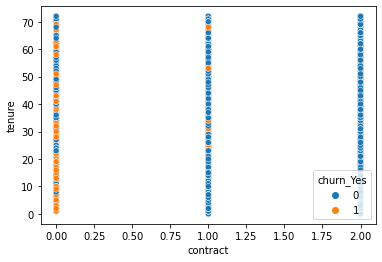

In [47]:
# seeing the relation between contract and tenure
sns.scatterplot(x = train_dfNew.contract, y = train_dfNew.tenure, hue = train_dfNew.churn_Yes )

In [48]:
train_dfNewer = train_dfNew.drop(columns=['totalCharges','has_internetService_No'])
train_dfNewer.head()

,tenure,monthlyCharges,contract,gender_Female,has_partner_Yes,has_dependents_Yes,has_internetService_DSL,onlineSecurity_No,onlineBackup_No,deviceProtection_No,techSupport_No,streamingTV_No,streamingMovies_No,has_paperlessBilling_Yes,paymentMethod_Bank transfer (automatic),paymentMethod_Credit card (automatic),paymentMethod_Electronic check,churn_Yes
0,12,19.70,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,42,73.90,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,71,65.15,2,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0
3,71,85.45,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0
4,30,70.40,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0


Random state acts as a seed, so as we havent changed any row indices, the random state =1 will return the same rows in the split

In [49]:
x_newer = train_dfNewer[train_dfNewer.columns[:-1]]
y_newer = train_dfNewer['churn_Yes']
x_train_newer, x_test_newer, y_train_newer, y_test_newer = train_test_split(x_newer, y_newer, test_size=0.2, random_state=1)

# checking if the split is same
print(x_train.tenure[:5])
print(x_train_newer.tenure[:5])

2365    30
1300    23
3251    14
2354    56
579     63
Name: tenure, dtype: int64
2365    30
1300    23
3251    14
2354    56
579     63
Name: tenure, dtype: int64


In [50]:
logreg4 = LogisticRegression()
logreg4.fit(x_train_newer, y_train_newer)

print(f"Training Accuracy : {logreg4.score(x_train_newer, y_train_newer)}")
print(f"Testing Accuracy : {logreg4.score(x_test_newer, y_test_newer)}")

Training Accuracy : 0.7960949633902817
Testing Accuracy : 0.8021295474711624


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We dont see any considerable difference here, too. So probably the accuracy of the model cannot be increased using logistic regression.

Fin.